In [69]:
from sklearn.linear_model import LogisticRegression
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc,classification_report,accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import itertools

import warnings
from sklearn.svm import SVC
from sklearn.metrics import f1_score,matthews_corrcoef,recall_score,precision_recall_curve
from feature_selector import FeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import average_precision_score
from sklearn.model_selection import LeaveOneOut
warnings.filterwarnings("ignore")
plt.rcParams['figure.constrained_layout.use'] = True

In [2]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [3]:

def printPerformance(actual,predicted):
    
    print("Mean Accuracy: {0}".format(accuracy_score(actual,predicted)))
    print("Mean Precision: {0}".format(precision_score(actual,predicted)))
    print("Mean Recall: {0}".format(recall_score(actual,predicted)))
    print("Mean MCC Score: {0}".format(matthews_corrcoef(actual,predicted)))
    print("Mean F1-Score: {0}".format(f1_score(actual,predicted)))
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    specificity = tn / (tn+fp)
    print("specificity: {0}".format(specificity))

In [4]:
class_names=['Rural','Urban']

In [5]:
df=pd.read_csv('CleanedData.csv')

In [6]:
df.head()

,Unnamed: 0,UID,Current Stream,HigherStudyMarks,SecClassMarks,B.Tech CGPA,EnglishScore,QuntAbility,LogicalAbility,ProgrammingScore,DomaninKnowledge,AutomataScore,AutomataFixScore,EssayWritingScore,Backlog,Gender,PlacementStatus,OfferedSalary
0,0,17BCS3755,0,79.8,64.4,48.7,615.0,380.0,250.0,370.0,340.0,9.0,0.0,306.0,4.0,1,0,0.0
1,1,17BCS3756,0,93.1,88.6,78.0,615.0,640.0,660.0,625.0,580.0,52.0,0.0,648.0,0.0,1,1,4.5
2,2,17BCS3757,0,74.0,70.6,63.1,645.0,410.0,610.0,240.0,380.0,7.0,0.0,612.0,0.0,0,0,0.0
3,3,17BCS3758,0,95.0,80.4,81.3,805.0,710.0,680.0,670.0,700.0,79.0,0.0,495.0,0.0,1,1,6.5
4,4,17BCS3759,0,87.4,70.8,76.8,735.0,505.0,585.0,375.0,420.0,4.0,0.0,567.0,0.0,0,0,0.0


In [7]:
df.isnull().sum()

Unnamed: 0           0
UID                  0
Current Stream       0
HigherStudyMarks     0
SecClassMarks        0
B.Tech CGPA          0
EnglishScore         0
QuntAbility          0
LogicalAbility       0
ProgrammingScore     0
DomaninKnowledge     0
AutomataScore        0
AutomataFixScore     0
EssayWritingScore    0
Backlog              0
Gender               0
PlacementStatus      0
OfferedSalary        0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(515, 18)

In [10]:
y=df['PlacementStatus']
final_df=df.drop(['PlacementStatus'],axis=1)

In [11]:
final_df.drop(['Unnamed: 0','UID','OfferedSalary'],axis=1,inplace=True)
y.value_counts()


1    336
0    179
Name: PlacementStatus, dtype: int64

In [12]:
X=final_df

In [13]:
scaler=StandardScaler()
Scaled_X=scaler.fit_transform(X)
#xtest_scaled=scaler.transform(xtest)

In [14]:
def run_kfold(clf,X):
    #kf=LeaveOneOut()
    kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    #####,
    AccList=np.array([])
    F1List=np.array([])
    mccList=np.array([])
    recallList=np.array([])
    precisionList=np.array([])
    specificityList=np.array([])
    predicted_targets = np.array([])
    actual_targets = np.array([])
    #######
   
    fold = 0
    for train_index, test_index in kf.split(X,y):
        fold += 1
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        clf.fit(Xtrain, ytrain)
        predictions = clf.predict(Xtest)
        #####
        predicted_targets = np.append(predicted_targets, predictions)
        actual_targets = np.append(actual_targets, ytest)
        AccList=np.append(AccList,accuracy_score(ytest,predictions))
        F1List=np.append(F1List,f1_score(ytest,predictions))
        mccList=np.append(mccList,matthews_corrcoef(ytest,predictions))
        recallList=np.append(recallList,recall_score(ytest,predictions))
        precisionList=np.append(precisionList,precision_score(ytest,predictions))
        tn, fp, fn, tp = confusion_matrix(ytest,predictions).ravel()
        specificity = tn / (tn+fp)
        specificityList=np.append(specificityList,specificity)
        #####
      
    return predicted_targets, actual_targets,AccList,F1List,mccList,recallList,precisionList,specificityList

In [15]:
logreg = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'newton-cg',random_state=0)
lrpredicted_target, lractual_target,AccList,F1List,mccList,recallList,precisionList,specificityList=run_kfold(logreg,Scaled_X)
printPerformance(lractual_target,lrpredicted_target)
print("std dev Accuracy: {0}".format(np.std(AccList)))
print("std dev F1-Score: {0}".format(np.std(F1List)))
print("std dev mcc: {0}".format(np.std(mccList)))
print("std dev recall score: {0}".format(np.std(recallList)))
print("std dev precision score: {0}".format(precisionList.std()))
print("std dev specificity score: {0}".format(specificityList.std()))

Mean Accuracy: 0.7475728155339806
Mean Precision: 0.748792270531401
Mean Recall: 0.9226190476190477
Mean MCC Score: 0.4097040642319716
Mean F1-Score: 0.8266666666666668
specificity: 0.41899441340782123
std dev Accuracy: 0.03383437327748552
std dev F1-Score: 0.02482794106003353
std dev mcc: 0.08455401223735876
std dev recall score: 0.04344405563976449
std dev precision score: 0.027242240040578992
std dev specificity score: 0.07923337234348622


In [16]:


randomforest = RandomForestClassifier(random_state=0, criterion= 'gini',
                            max_features= 5,
                            min_samples_leaf=2,
                            min_samples_split= 2,
                            n_estimators=50,
                            n_jobs=-1,
                            oob_score= True,
                            warm_start= True)
rfpredicted_target, rfactual_target,AccList,F1List,mccList,recallList,precisionList,specificityList=run_kfold(randomforest,Scaled_X)
printPerformance(rfactual_target,rfpredicted_target)
print("std dev Accuracy: {0}".format(np.std(AccList)))
print("std dev F1-Score: {0}".format(np.std(F1List)))
print("std dev mcc: {0}".format(np.std(mccList)))
print("std dev recall score: {0}".format(np.std(recallList)))
print("std dev precision score: {0}".format(precisionList.std()))
print("std dev specificity score: {0}".format(specificityList.std()))

Mean Accuracy: 0.9689320388349515
Mean Precision: 0.9705882352941176
Mean Recall: 0.9821428571428571
Mean MCC Score: 0.9312762370666195
Mean F1-Score: 0.9763313609467456
specificity: 0.9441340782122905
std dev Accuracy: 0.050277909734461564
std dev F1-Score: 0.03682713686092306
std dev mcc: 0.11411720118343056
std dev recall score: 0.02699652173950262
std dev precision score: 0.0485328508430861
std dev specificity score: 0.09938079899999067


In [17]:


sc = StandardScaler()
svc = SVC(C= 100, gamma= 0.0001, kernel= 'rbf',random_state=0)
#X_train = sc.fit_transform(X)
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    #####,
svcAccList=np.array([])
svcF1List=np.array([])
svcmccList=np.array([])
svcrecallList=np.array([])
svcprecisionList=np.array([])
svcspecificityList=np.array([])
svcpredicted_targets = np.array([])
svcactual_targets = np.array([])
    #######
   
fold = 0
for train_index, test_index in kf.split(X,y):
    fold += 1
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    Xtrain=sc.fit_transform(Xtrain)
    Xtest=sc.transform(Xtest)
    svc.fit(Xtrain, ytrain)
    svcpredictions = svc.predict(Xtest)
    svcpredicted_targets = np.append(svcpredicted_targets, svcpredictions)
    svcactual_targets = np.append(svcactual_targets, ytest)
    svcAccList=np.append(svcAccList,accuracy_score(ytest,svcpredictions))
    svcF1List=np.append(svcF1List,f1_score(ytest,svcpredictions))
    svcmccList=np.append(svcmccList,matthews_corrcoef(ytest,svcpredictions))
    svcrecallList=np.append(svcrecallList,recall_score(ytest,svcpredictions))
    svcprecisionList=np.append(svcprecisionList,precision_score(ytest,svcpredictions))
    tn, fp, fn, tp = confusion_matrix(ytest,svcpredictions).ravel()
    svcspecificity = tn / (tn+fp)
    svcspecificityList=np.append(svcspecificityList,svcspecificity)

printPerformance(svcactual_targets,svcpredicted_targets)
print("std dev Accuracy: {0}".format(np.std(svcAccList)))
print("std dev F1-Score: {0}".format(np.std(svcF1List)))
print("std dev mcc: {0}".format(np.std(svcmccList)))
print("std dev recall score: {0}".format(np.std(svcrecallList)))
print("std dev precision score: {0}".format(svcprecisionList.std()))
print("std dev specificity score: {0}".format(svcspecificityList.std()))


Mean Accuracy: 0.7631067961165049
Mean Precision: 0.7584541062801933
Mean Recall: 0.9345238095238095
Mean MCC Score: 0.45078215107699554
Mean F1-Score: 0.8373333333333334
specificity: 0.441340782122905
std dev Accuracy: 0.029131125234920823
std dev F1-Score: 0.023020385957148486
std dev mcc: 0.0733978343485287
std dev recall score: 0.04838480556279903
std dev precision score: 0.021859369738981452
std dev specificity score: 0.07095342474512469


In [ ]:
#roc curves

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [67]:
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.25,random_state=0)

In [70]:
# Logistic regression
modelLR = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'newton-cg',random_state=0)
modelLR.fit(train_X,train_Y)
y_pred_prob_lr = modelLR.predict_proba(test_X)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(C= 100, gamma= 0.0001, kernel= 'rbf',random_state=0,probability=True)
modelSVMrbf.fit(train_X,train_Y)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(test_X)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(test_Y, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(test_Y, y_pred_prob_SVMrbf)


# Random forest
modelRF= RandomForestClassifier(random_state=0, criterion= 'gini',
                            max_features= 5,
                            min_samples_leaf=2,
                            min_samples_split= 2,
                            n_estimators=50,
                            n_jobs=-1,
                            oob_score= True,
                            warm_start= True)
modelRF.fit(train_X,train_Y)
y_pred_prob_rf = modelRF.predict_proba(test_X)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(test_Y, y_pred_prob_rf)




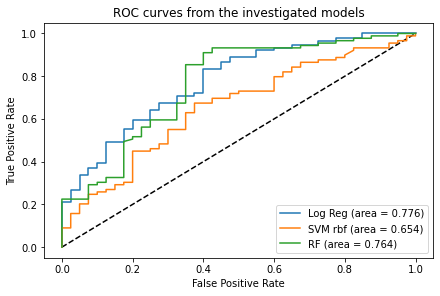

In [72]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

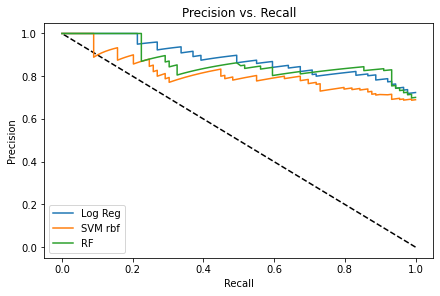

In [73]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_rf, precision_rf, label='RF')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [18]:
pca=PCA(n_components=9)
x_pca=pca.fit_transform(scaler.fit_transform(X))


In [19]:
x_pca.shape

(515, 9)

In [20]:
expl_var_pca = np.var(x_pca, axis=0)


In [21]:
expl_var_pca

array([4.99882198, 1.47051912, 1.31313226, 1.0276621 , 0.96468406,
       0.79358706, 0.57647982, 0.55377685, 0.53166136])

In [22]:
eigenvalues=pca.components_

In [23]:
N_elements=10
PC1=abs(eigenvalues[1,:])
PC1.sort(axis=0)
PC1=PC1[::-1]
PC1=PC1[0:N_elements]
PC1

array([0.38164568, 0.37665822, 0.36400414, 0.3596921 , 0.35864587,
       0.34232312, 0.30358556, 0.29622903, 0.11844257, 0.06753684])

In [24]:
logreg = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'newton-cg',random_state=0)
lrpredicted_target, lractual_target,AccList,F1List,mccList,recallList,precisionList,specificityList=run_kfold(logreg,x_pca)
printPerformance(lractual_target,lrpredicted_target)
print("std dev Accuracy: {0}".format(np.std(AccList)))
print("std dev F1-Score: {0}".format(np.std(F1List)))
print("std dev mcc: {0}".format(np.std(mccList)))
print("std dev recall score: {0}".format(np.std(recallList)))
print("std dev precision score: {0}".format(precisionList.std()))
print("std dev specificity score: {0}".format(specificityList.std()))

Mean Accuracy: 0.7514563106796116
Mean Precision: 0.7561576354679803
Mean Recall: 0.9136904761904762
Mean MCC Score: 0.4204042606597828
Mean F1-Score: 0.8274932614555256
specificity: 0.44692737430167595
std dev Accuracy: 0.040347418978735165
std dev F1-Score: 0.029097656986918664
std dev mcc: 0.1027263542146675
std dev recall score: 0.047516160062951514
std dev precision score: 0.03097882347057801
std dev specificity score: 0.08482202257486741


In [25]:

randomforest = RandomForestClassifier(random_state=0, criterion= 'gini',
                            max_features= 5,
                            min_samples_leaf=2,
                            min_samples_split= 2,
                            n_estimators=50,
                            n_jobs=-1,
                            oob_score= True,
                            warm_start= True)
rfpredicted_target, rfactual_target,AccList,F1List,mccList,recallList,precisionList,specificityList=run_kfold(randomforest,x_pca)
printPerformance(rfactual_target,rfpredicted_target)
print("std dev Accuracy: {0}".format(np.std(AccList)))
print("std dev F1-Score: {0}".format(np.std(F1List)))
print("std dev mcc: {0}".format(np.std(mccList)))
print("std dev recall score: {0}".format(np.std(recallList)))
print("std dev precision score: {0}".format(precisionList.std()))
print("std dev specificity score: {0}".format(specificityList.std()))

Mean Accuracy: 0.974757281553398
Mean Precision: 0.9736070381231672
Mean Recall: 0.9880952380952381
Mean MCC Score: 0.9441955213641661
Mean F1-Score: 0.980797636632201
specificity: 0.9497206703910615
std dev Accuracy: 0.05090784026361068
std dev F1-Score: 0.03731181757764358
std dev mcc: 0.11544518675000083
std dev recall score: 0.026956327617387303
std dev precision score: 0.04755535884884443
std dev specificity score: 0.09768126375042828


In [26]:


sc = StandardScaler()
svc = SVC(C= 100, gamma= 0.0001, kernel= 'rbf',random_state=0)
#X_train = sc.fit_transform(X)
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    #####,
svcAccList=np.array([])
svcF1List=np.array([])
svcmccList=np.array([])
svcrecallList=np.array([])
svcprecisionList=np.array([])
svcspecificityList=np.array([])
svcpredicted_targets = np.array([])
svcactual_targets = np.array([])
    #######
   
fold = 0
for train_index, test_index in kf.split(x_pca,y):
    fold += 1
    Xtrain, Xtest = x_pca[train_index], x_pca[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    Xtrain=sc.fit_transform(Xtrain)
    Xtest=sc.transform(Xtest)
    svc.fit(Xtrain, ytrain)
    svcpredictions = svc.predict(Xtest)
    svcpredicted_targets = np.append(svcpredicted_targets, svcpredictions)
    svcactual_targets = np.append(svcactual_targets, ytest)
    svcAccList=np.append(svcAccList,accuracy_score(ytest,svcpredictions))
    svcF1List=np.append(svcF1List,f1_score(ytest,svcpredictions))
    svcmccList=np.append(svcmccList,matthews_corrcoef(ytest,svcpredictions))
    svcrecallList=np.append(svcrecallList,recall_score(ytest,svcpredictions))
    svcprecisionList=np.append(svcprecisionList,precision_score(ytest,svcpredictions))
    tn, fp, fn, tp = confusion_matrix(ytest,svcpredictions).ravel()
    svcspecificity = tn / (tn+fp)
    svcspecificityList=np.append(svcspecificityList,svcspecificity)

printPerformance(svcactual_targets,svcpredicted_targets)
print("std dev Accuracy: {0}".format(np.std(svcAccList)))
print("std dev F1-Score: {0}".format(np.std(svcF1List)))
print("std dev mcc: {0}".format(np.std(svcmccList)))
print("std dev recall score: {0}".format(np.std(svcrecallList)))
print("std dev precision score: {0}".format(svcprecisionList.std()))
print("std dev specificity score: {0}".format(svcspecificityList.std()))


Mean Accuracy: 0.7456310679611651
Mean Precision: 0.7378190255220418
Mean Recall: 0.9464285714285714
Mean MCC Score: 0.4061873968211577
Mean F1-Score: 0.8292046936114733
specificity: 0.3687150837988827
std dev Accuracy: 0.04671653528419913
std dev F1-Score: 0.031414775582690097
std dev mcc: 0.1338178314555741
std dev recall score: 0.04623804830676943
std dev precision score: 0.03259795122445356
std dev specificity score: 0.09636700250219947


In [27]:
map= pd.DataFrame(pca.components_.T,index=final_df.columns.values)
map.head()

,0,1,2,3,4,5,6,7,8
Current Stream,0.093209,-0.118443,-0.270397,-0.054682,0.887245,-0.277128,0.052721,0.113221,0.084311
HigherStudyMarks,-0.227509,0.364004,0.298241,0.331171,0.148578,-0.279149,-0.021005,-0.239573,-0.081983
SecClassMarks,-0.245178,0.359692,0.145551,0.437376,-0.006896,-0.300648,-0.041109,0.144256,-0.000685
B.Tech CGPA,-0.338389,0.381646,-0.024031,-0.263386,0.106695,-0.015542,0.017583,0.053119,0.099105
EnglishScore,-0.288316,-0.376658,0.205036,0.089660,-0.073020,-0.042122,-0.125125,0.283841,0.214776


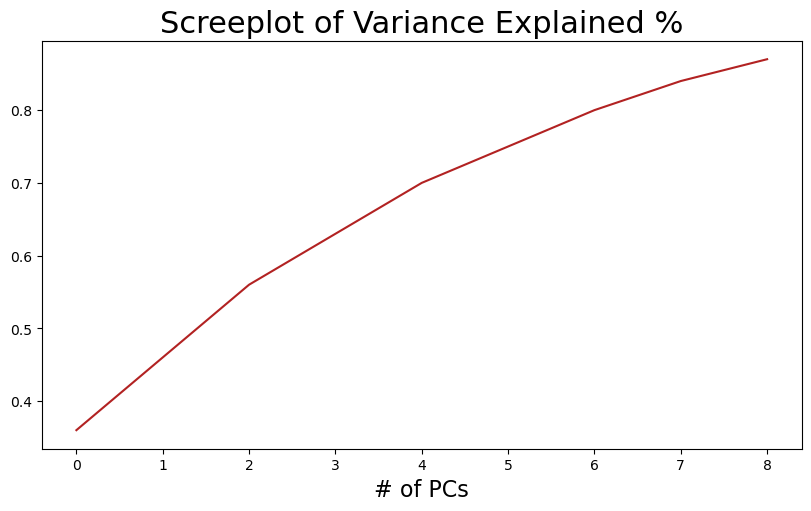

In [28]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(8,5), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [29]:
# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = original_num_df.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  =new_columns

    # Return importance df
    return importance_df



In [30]:
# Call function to create importance df
importance_df  =create_importance_dataframe(pca, final_df)

# Show first few rows
display(importance_df.head(10))

# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 feautres are \n')
display(pc1_top_10_features )

## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 feautres are \n')

display(pc2_top_10_features )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Current Stream,0.093209,0.118443,0.270397,0.054682,0.887245,0.277128,0.052721,0.113221,0.084311
HigherStudyMarks,0.227509,0.364004,0.298241,0.331171,0.148578,0.279149,0.021005,0.239573,0.081983
SecClassMarks,0.245178,0.359692,0.145551,0.437376,0.006896,0.300648,0.041109,0.144256,0.000685
B.Tech CGPA,0.338389,0.381646,0.024031,0.263386,0.106695,0.015542,0.017583,0.053119,0.099105
EnglishScore,0.288316,0.376658,0.205036,0.089660,0.073020,0.042122,0.125125,0.283841,0.214776
QuntAbility,0.290967,0.303586,0.003792,0.159945,0.039349,0.211578,0.468102,0.478768,0.249899
LogicalAbility,0.339903,0.342323,0.099155,0.057474,0.004260,0.127845,0.208469,0.026830,0.053032
ProgrammingScore,0.309229,0.012603,0.239463,0.004693,0.055580,0.246538,0.448099,0.459624,0.366587
DomaninKnowledge,0.322045,0.067537,0.099368,0.020200,0.009796,0.059906,0.108928,0.608668,0.619040
AutomataScore,0.295278,0.034866,0.336245,0.233489,0.034294,0.277534,0.043298,0.037494,0.418206



PC1 top 10 feautres are 



LogicalAbility       0.339903
B.Tech CGPA          0.338389
DomaninKnowledge     0.322045
ProgrammingScore     0.309229
AutomataScore        0.295278
QuntAbility          0.290967
EnglishScore         0.288316
AutomataFixScore     0.284405
EssayWritingScore    0.266313
SecClassMarks        0.245178
Name: PC1, dtype: float64


PC2 top 10 feautres are 



B.Tech CGPA          0.381646
EnglishScore         0.376658
HigherStudyMarks     0.364004
SecClassMarks        0.359692
Backlog              0.358646
LogicalAbility       0.342323
QuntAbility          0.303586
EssayWritingScore    0.296229
Current Stream       0.118443
DomaninKnowledge     0.067537
Name: PC2, dtype: float64

In [31]:
pca.explained_variance_ratio_

array([0.35705871, 0.10503708, 0.09379516, 0.07340444, 0.068906  ,
       0.05668479, 0.04117713, 0.03955549, 0.03797581])

Text(0.5, 1.0, 'Contributions of variables to PC1')

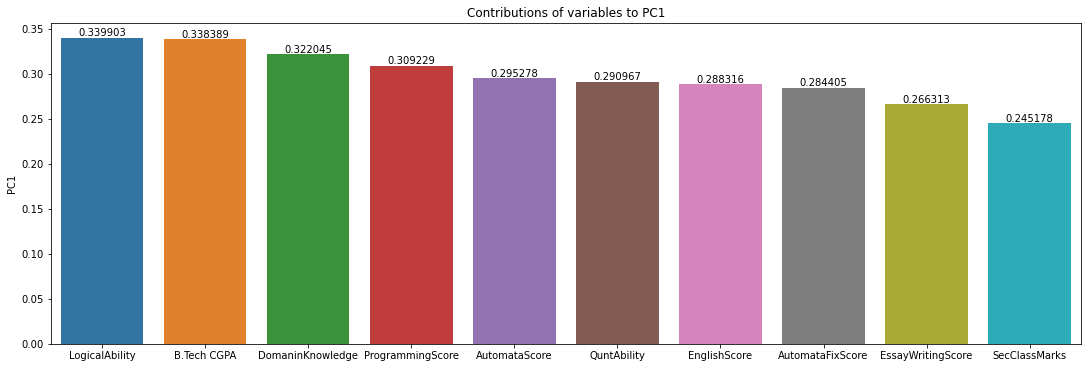

In [32]:

plt.figure(figsize=(15,5))

ax=sns.barplot(x=pc1_top_10_features.index,y=pc1_top_10_features,ci='none')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Contributions of variables to PC1')

Text(0.5, 1.0, 'Contributions of variables to PC2')

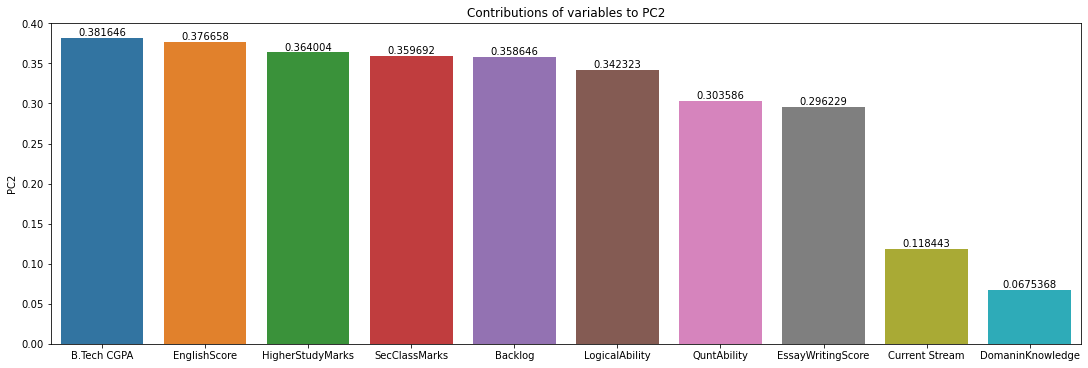

In [33]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x=pc2_top_10_features.index,y=pc2_top_10_features,ci='none')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Contributions of variables to PC2')

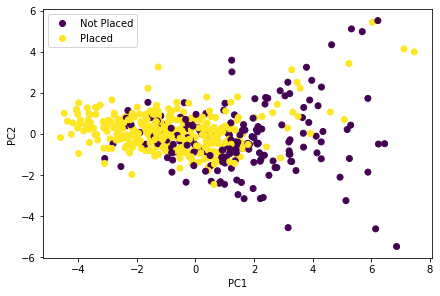

In [34]:
classes = ['Not Placed','Placed']
ax=plt.scatter(x_pca[:,0], x_pca[:,1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend(handles=ax.legend_elements()[0],labels=classes)
plt.show()

In [ ]:
#plot roc curve after pca

In [74]:
train_X,test_X,train_Y,test_Y=train_test_split(x_pca,y,test_size=0.25,random_state=0)

In [75]:
# Logistic regression
modelLR = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'newton-cg',random_state=0)
modelLR.fit(train_X,train_Y)
y_pred_prob_lr = modelLR.predict_proba(test_X)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

# SVM with rbf
modelSVMrbf=svm.SVC(C= 100, gamma= 0.0001, kernel= 'rbf',random_state=0,probability=True)
modelSVMrbf.fit(train_X,train_Y)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(test_X)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(test_Y, y_pred_prob_SVMrbf)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(test_Y, y_pred_prob_SVMrbf)


# Random forest
modelRF= RandomForestClassifier(random_state=0, criterion= 'gini',
                            max_features= 5,
                            min_samples_leaf=2,
                            min_samples_split= 2,
                            n_estimators=50,
                            n_jobs=-1,
                            oob_score= True,
                            warm_start= True)
modelRF.fit(train_X,train_Y)
y_pred_prob_rf = modelRF.predict_proba(test_X)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_Y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(test_Y, y_pred_prob_rf)




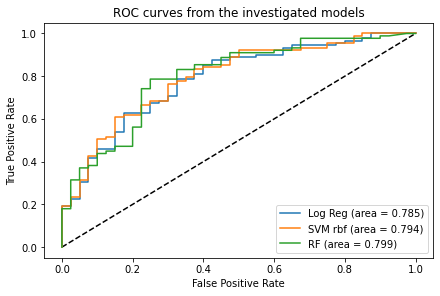

In [76]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

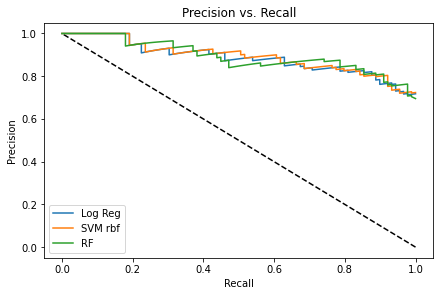

In [77]:
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Log Reg')
plt.plot(recall_SVMrbf, precision_SVMrbf, label='SVM rbf')
plt.plot(recall_rf, precision_rf, label='RF')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [35]:
fs = FeatureSelector(data =X , labels = y)

In [36]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.



In [37]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 14 original features
There are 0 one-hot features


In [38]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[0:60]

[]

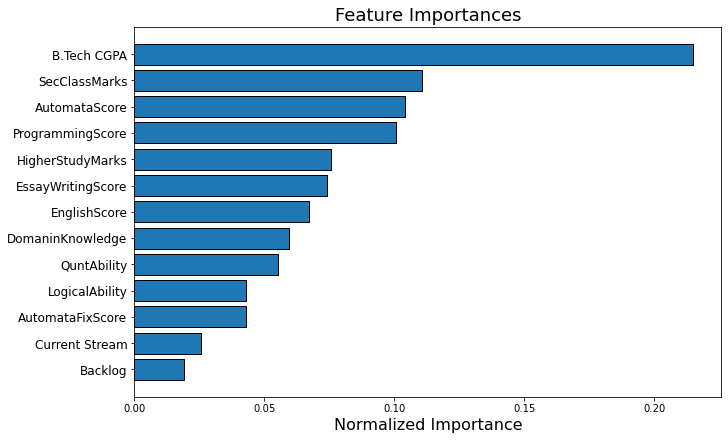

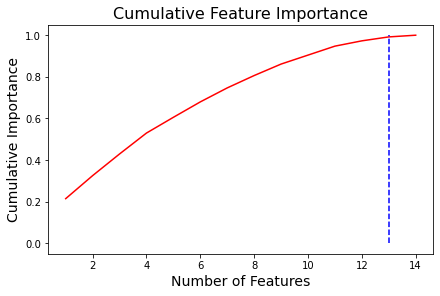

13 features required for 0.99 of cumulative importance


In [39]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 35)

In [40]:
fs.feature_importances.head(54)

,feature,importance,normalized_importance,cumulative_importance
0,B.Tech CGPA,65.9,0.214938,0.214938
1,SecClassMarks,33.9,0.110568,0.325506
2,AutomataScore,31.9,0.104044,0.429550
3,ProgrammingScore,30.8,0.100457,0.530007
4,HigherStudyMarks,23.2,0.075669,0.605675
5,EssayWritingScore,22.7,0.074038,0.679713
6,EnglishScore,20.6,0.067189,0.746902
7,DomaninKnowledge,18.2,0.059361,0.806262
8,QuntAbility,16.9,0.055121,0.861383
9,LogicalAbility,13.2,0.043053,0.904436


In [41]:


fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

0 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model


0 features with zero importance after one-hot encoding.

12 features required for cumulative importance of 0.99 after one hot encoding.
2 features do not contribute to cumulative importance of 0.99.

2 total features out of 14 identified for removal after one-hot encoding.



In [42]:
train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)

['zero_importance', 'missing', 'single_unique', 'collinear', 'low_importance'] methods have been run

Removed 2 features.


In [43]:
fs.feature_importances.head()

,feature,importance,normalized_importance,cumulative_importance
0,B.Tech CGPA,51.7,0.192982,0.192982
1,SecClassMarks,27.3,0.101904,0.294886
2,AutomataScore,27.0,0.100784,0.395670
3,ProgrammingScore,23.7,0.088466,0.484136
4,EnglishScore,23.5,0.087719,0.571855


In [44]:
train_removed_all_once.shape

(515, 12)

In [45]:
train_removed_all_once.head()

,Current Stream,HigherStudyMarks,SecClassMarks,B.Tech CGPA,EnglishScore,QuntAbility,LogicalAbility,ProgrammingScore,DomaninKnowledge,AutomataScore,AutomataFixScore,EssayWritingScore
0,0,79.8,64.4,48.7,615.0,380.0,250.0,370.0,340.0,9.0,0.0,306.0
1,0,93.1,88.6,78.0,615.0,640.0,660.0,625.0,580.0,52.0,0.0,648.0
2,0,74.0,70.6,63.1,645.0,410.0,610.0,240.0,380.0,7.0,0.0,612.0
3,0,95.0,80.4,81.3,805.0,710.0,680.0,670.0,700.0,79.0,0.0,495.0
4,0,87.4,70.8,76.8,735.0,505.0,585.0,375.0,420.0,4.0,0.0,567.0


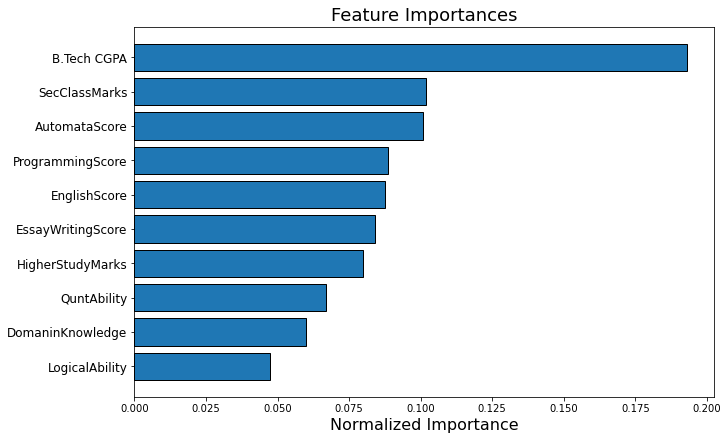

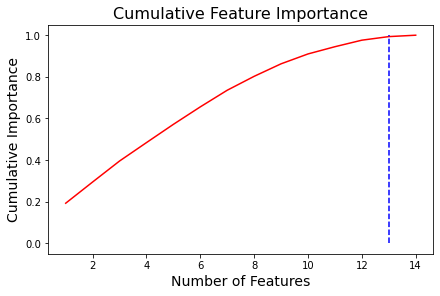

13 features required for 0.99 of cumulative importance


In [46]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 10)

In [47]:
logreg = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'newton-cg',random_state=0)
lrpredicted_target, lractual_target,AccList,F1List,mccList,recallList,precisionList,specificityList=run_kfold(logreg,np.array(train_removed_all_once))
printPerformance(lractual_target,lrpredicted_target)
print("std dev Accuracy: {0}".format(np.std(AccList)))
print("std dev F1-Score: {0}".format(np.std(F1List)))
print("std dev mcc: {0}".format(np.std(mccList)))
print("std dev recall score: {0}".format(np.std(recallList)))
print("std dev precision score: {0}".format(precisionList.std()))
print("std dev specificity score: {0}".format(specificityList.std()))

Mean Accuracy: 0.7475728155339806
Mean Precision: 0.7768817204301075
Mean Recall: 0.8601190476190477
Mean MCC Score: 0.4215268624440371
Mean F1-Score: 0.8163841807909604
specificity: 0.5363128491620112
std dev Accuracy: 0.05970217246294724
std dev F1-Score: 0.04275392587670661
std dev mcc: 0.14256655615271646
std dev recall score: 0.050201993478461826
std dev precision score: 0.04788787068355602
std dev specificity score: 0.11544600432110418


In [48]:

randomforest = RandomForestClassifier(random_state=0, criterion= 'gini',
                            max_features= 5,
                            min_samples_leaf=2,
                            min_samples_split= 2,
                            n_estimators=50,
                            n_jobs=-1,
                            oob_score= True,
                            warm_start= True)
rfpredicted_target, rfactual_target,AccList,F1List,mccList,recallList,precisionList,specificityList=run_kfold(randomforest,np.array(train_removed_all_once))
printPerformance(rfactual_target,rfpredicted_target)
print("std dev Accuracy: {0}".format(np.std(AccList)))
print("std dev F1-Score: {0}".format(np.std(F1List)))
print("std dev mcc: {0}".format(np.std(mccList)))
print("std dev recall score: {0}".format(np.std(recallList)))
print("std dev precision score: {0}".format(precisionList.std()))
print("std dev specificity score: {0}".format(specificityList.std()))

Mean Accuracy: 0.9650485436893204
Mean Precision: 0.9704142011834319
Mean Recall: 0.9761904761904762
Mean MCC Score: 0.9227672660323161
Mean F1-Score: 0.973293768545994
specificity: 0.9441340782122905
std dev Accuracy: 0.06127886050223153
std dev F1-Score: 0.04621305470738451
std dev mcc: 0.13701325959178037
std dev recall score: 0.04519560300520009
std dev precision score: 0.049490240493762404
std dev specificity score: 0.09622504486493763


In [49]:


sc = StandardScaler()
svc = SVC(C= 100, gamma= 0.0001, kernel= 'rbf',random_state=0)
#X_train = sc.fit_transform(X)
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    #####,
svcAccList=np.array([])
svcF1List=np.array([])
svcmccList=np.array([])
svcrecallList=np.array([])
svcprecisionList=np.array([])
svcspecificityList=np.array([])
svcpredicted_targets = np.array([])
svcactual_targets = np.array([])
    #######
train_removed_all_once1=np.array(train_removed_all_once)
fold = 0
for train_index, test_index in kf.split(train_removed_all_once1,y):
    fold += 1
    Xtrain, Xtest = train_removed_all_once1[train_index], train_removed_all_once1[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    Xtrain=sc.fit_transform(Xtrain)
    Xtest=sc.transform(Xtest)
    svc.fit(Xtrain, ytrain)
    svcpredictions = svc.predict(Xtest)
    svcpredicted_targets = np.append(svcpredicted_targets, svcpredictions)
    svcactual_targets = np.append(svcactual_targets, ytest)
    svcAccList=np.append(svcAccList,accuracy_score(ytest,svcpredictions))
    svcF1List=np.append(svcF1List,f1_score(ytest,svcpredictions))
    svcmccList=np.append(svcmccList,matthews_corrcoef(ytest,svcpredictions))
    svcrecallList=np.append(svcrecallList,recall_score(ytest,svcpredictions))
    svcprecisionList=np.append(svcprecisionList,precision_score(ytest,svcpredictions))
    tn, fp, fn, tp = confusion_matrix(ytest,svcpredictions).ravel()
    svcspecificity = tn / (tn+fp)
    svcspecificityList=np.append(svcspecificityList,svcspecificity)

printPerformance(svcactual_targets,svcpredicted_targets)
print("std dev Accuracy: {0}".format(np.std(svcAccList)))
print("std dev F1-Score: {0}".format(np.std(svcF1List)))
print("std dev mcc: {0}".format(np.std(svcmccList)))
print("std dev recall score: {0}".format(np.std(svcrecallList)))
print("std dev precision score: {0}".format(svcprecisionList.std()))
print("std dev specificity score: {0}".format(svcspecificityList.std()))


Mean Accuracy: 0.7495145631067961
Mean Precision: 0.7568238213399504
Mean Recall: 0.9077380952380952
Mean MCC Score: 0.41585420253948957
Mean F1-Score: 0.8254397834912044
specificity: 0.45251396648044695
std dev Accuracy: 0.053021793865594385
std dev F1-Score: 0.03925474829230867
std dev mcc: 0.1283075059249978
std dev recall score: 0.05306556744767095
std dev precision score: 0.03503652264798762
std dev specificity score: 0.07877376245725752


In [50]:
df1=final_df.copy()
cols = df1.columns
df1[cols] = df1.filter(cols).fillna(df1.mode().iloc[0])


In [51]:
# Getting the target column and drop 'Patient ID' column
y_train = y
df1 = X

In [52]:
from Py_FS.filter import MI as FS
solution1=FS(X,y)

In [53]:
solution1.ranks

array([13,  2,  1,  0, 10,  8,  6,  4, 11,  3,  7,  9,  5, 12],
      dtype=int64)

B.Tech CGPA          0.700000
SecClassMarks        0.524867
HigherStudyMarks     0.461011
AutomataScore        0.453377
ProgrammingScore     0.423553
Backlog              0.419547
LogicalAbility       0.400855
AutomataFixScore     0.350174
QuntAbility          0.348862
EssayWritingScore    0.310873
EnglishScore         0.303609
DomaninKnowledge     0.301599
Gender               0.301597
Current Stream       0.262898
dtype: float64

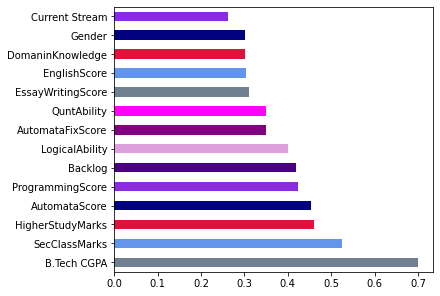

In [54]:
feat_importances1 = pd.Series(solution1.scores, index=X.columns)
feat_importances1.nlargest(X.columns.shape[0]).plot(kind='barh',color=['slategrey', 'cornflowerblue', 'crimson', 'navy', 'blueviolet','indigo','plum','purple','magenta'])
feat_importances1.nlargest(X.columns.shape[0])
#feat_importances.to_csv('Feature score HF prediction using xgb.csv ')
#plt.savefig('infogain_fe.png')

In [55]:
from Py_FS.filter import PCC as FS
solution2=FS(X,y)

B.Tech CGPA          0.700000
Backlog              0.576144
AutomataScore        0.552893
ProgrammingScore     0.504195
SecClassMarks        0.492734
HigherStudyMarks     0.446019
EssayWritingScore    0.411172
DomaninKnowledge     0.395138
AutomataFixScore     0.390449
LogicalAbility       0.362773
EnglishScore         0.361464
QuntAbility          0.339222
Gender               0.320835
Current Stream       0.268403
dtype: float64

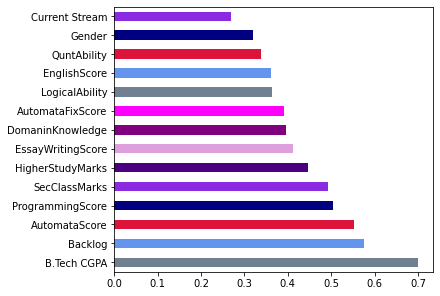

In [56]:
feat_importances2 = pd.Series(solution2.scores, index=X.columns)
feat_importances2.nlargest(X.columns.shape[0]).plot(kind='barh',color=['slategrey', 'cornflowerblue', 'crimson', 'navy', 'blueviolet','indigo','plum','purple','magenta'])
feat_importances2.nlargest(X.columns.shape[0])
#feat_importances.to_csv('Feature score HF prediction using xgb.csv ')
#plt.savefig('PCC_fe.png')

In [57]:
feat_importances2.sort_values(ascending=False),final_df.columns


(B.Tech CGPA          0.700000
 Backlog              0.576144
 AutomataScore        0.552893
 ProgrammingScore     0.504195
 SecClassMarks        0.492734
 HigherStudyMarks     0.446019
 EssayWritingScore    0.411172
 DomaninKnowledge     0.395138
 AutomataFixScore     0.390449
 LogicalAbility       0.362773
 EnglishScore         0.361464
 QuntAbility          0.339222
 Gender               0.320835
 Current Stream       0.268403
 dtype: float64,
 Index(['Current Stream', 'HigherStudyMarks', 'SecClassMarks', 'B.Tech CGPA',
        'EnglishScore', 'QuntAbility', 'LogicalAbility', 'ProgrammingScore',
        'DomaninKnowledge', 'AutomataScore', 'AutomataFixScore',
        'EssayWritingScore', 'Backlog', 'Gender'],
       dtype='object'))

In [58]:
from Py_FS.filter import Relief as FS
import numpy as np

solution3 = FS(np.array(X), y)

Backlog              1.000000
Gender               0.742251
AutomataFixScore     0.419250
DomaninKnowledge     0.300163
Current Stream       0.292007
AutomataScore        0.120718
HigherStudyMarks     0.060359
EnglishScore         0.053834
LogicalAbility       0.044046
ProgrammingScore     0.044046
QuntAbility          0.040783
EssayWritingScore    0.029364
SecClassMarks        0.001631
B.Tech CGPA          0.000000
dtype: float64

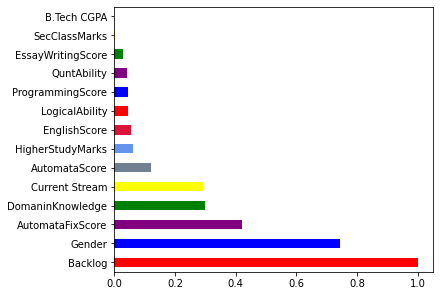

In [59]:
feat_importances3 = pd.Series(solution3.scores, index=X.columns)
feat_importances3.nlargest(X.columns.shape[0]).plot(kind='barh',color=['red', 'blue', 'purple', 'green', 'yellow','slategrey', 'cornflowerblue', 'crimson'])
feat_importances3.nlargest(X.columns.shape[0])
#feat_importances.to_csv('Feature score HF prediction using xgb.csv ')
#plt.savefig('Relief_fe.png')

In [60]:
feat_importances3.sort_values(ascending=False),final_df.columns


(Backlog              1.000000
 Gender               0.742251
 AutomataFixScore     0.419250
 DomaninKnowledge     0.300163
 Current Stream       0.292007
 AutomataScore        0.120718
 HigherStudyMarks     0.060359
 EnglishScore         0.053834
 LogicalAbility       0.044046
 ProgrammingScore     0.044046
 QuntAbility          0.040783
 EssayWritingScore    0.029364
 SecClassMarks        0.001631
 B.Tech CGPA          0.000000
 dtype: float64,
 Index(['Current Stream', 'HigherStudyMarks', 'SecClassMarks', 'B.Tech CGPA',
        'EnglishScore', 'QuntAbility', 'LogicalAbility', 'ProgrammingScore',
        'DomaninKnowledge', 'AutomataScore', 'AutomataFixScore',
        'EssayWritingScore', 'Backlog', 'Gender'],
       dtype='object'))

In [61]:
from skfeature.function.similarity_based import fisher_score
ranks=fisher_score.fisher_score(np.array(X),y,mode='rank')

<AxesSubplot:>

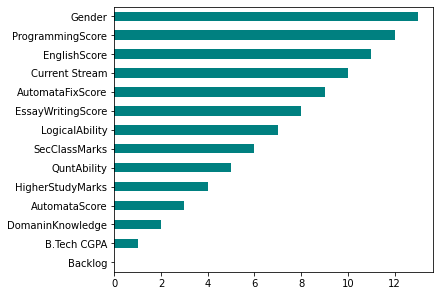

In [62]:
feature_importances4=pd.Series(ranks,final_df.columns[0:len(final_df.columns)])
feature_importances4.sort_values().plot(kind='barh',color='teal')
#plt.savefig('fisherscore_fe.png')

In [63]:
feature_importances4.sort_values(ascending=False),df.columns


(Gender               13
 ProgrammingScore     12
 EnglishScore         11
 Current Stream       10
 AutomataFixScore      9
 EssayWritingScore     8
 LogicalAbility        7
 SecClassMarks         6
 QuntAbility           5
 HigherStudyMarks      4
 AutomataScore         3
 DomaninKnowledge      2
 B.Tech CGPA           1
 Backlog               0
 dtype: int32,
 Index(['Unnamed: 0', 'UID', 'Current Stream', 'HigherStudyMarks',
        'SecClassMarks', 'B.Tech CGPA', 'EnglishScore', 'QuntAbility',
        'LogicalAbility', 'ProgrammingScore', 'DomaninKnowledge',
        'AutomataScore', 'AutomataFixScore', 'EssayWritingScore', 'Backlog',
        'Gender', 'PlacementStatus', 'OfferedSalary'],
       dtype='object'))

In [64]:
from Py_FS.filter import SCC as FS
solution5=FS(X,y)

B.Tech CGPA          0.700000
EssayWritingScore    0.660496
AutomataScore        0.654897
DomaninKnowledge     0.646919
EnglishScore         0.645994
SecClassMarks        0.644490
AutomataFixScore     0.641202
ProgrammingScore     0.617094
HigherStudyMarks     0.612616
Gender               0.604996
QuntAbility          0.597647
LogicalAbility       0.585909
Backlog              0.236275
Current Stream       0.235971
dtype: float64

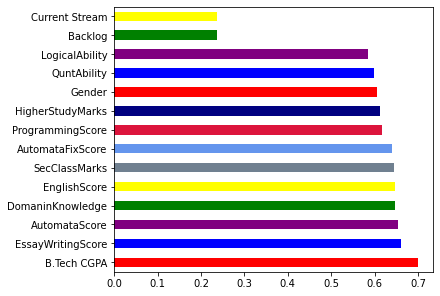

In [65]:
feat_importances5 = pd.Series(solution5.scores, index=X.columns)
feat_importances5.nlargest(X.columns.shape[0]).plot(kind='barh',color=['red', 'blue', 'purple', 'green', 'yellow','slategrey', 'cornflowerblue', 'crimson', 'navy'])
feat_importances5.nlargest(X.columns.shape[0])
#feat_importances.to_csv('Feature score HF prediction using xgb.csv ')
#plt.savefig('SCC_fe.png')

In [66]:
feat_importances5.sort_values(ascending=False),df.columns


(B.Tech CGPA          0.700000
 EssayWritingScore    0.660496
 AutomataScore        0.654897
 DomaninKnowledge     0.646919
 EnglishScore         0.645994
 SecClassMarks        0.644490
 AutomataFixScore     0.641202
 ProgrammingScore     0.617094
 HigherStudyMarks     0.612616
 Gender               0.604996
 QuntAbility          0.597647
 LogicalAbility       0.585909
 Backlog              0.236275
 Current Stream       0.235971
 dtype: float64,
 Index(['Unnamed: 0', 'UID', 'Current Stream', 'HigherStudyMarks',
        'SecClassMarks', 'B.Tech CGPA', 'EnglishScore', 'QuntAbility',
        'LogicalAbility', 'ProgrammingScore', 'DomaninKnowledge',
        'AutomataScore', 'AutomataFixScore', 'EssayWritingScore', 'Backlog',
        'Gender', 'PlacementStatus', 'OfferedSalary'],
       dtype='object'))